# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Training dataset

In [2]:
train = pd.read_csv('Future_sales_train.csv')
train.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173


In [3]:
train.shape

(22469, 6)

In [4]:
train.describe()

,PLAN_MONTH,PLAN_YEAR
count,22469.000000,22469.0
mean,11.039744,2019.0
std,0.800889,0.0
min,10.000000,2019.0
25%,10.000000,2019.0
50%,11.000000,2019.0
75%,12.000000,2019.0
max,12.000000,2019.0


In [5]:
print("we are dealing with ",len(train), "rows")
print("we are dealing with",len(train['PROD_CD'].unique()),"products")
print("we are dealing with",len(train['SLSMAN_CD'].unique()),"Salesman")

we are dealing with  22469 rows
we are dealing with 86 products
we are dealing with 224 Salesman


# Data Preprocessing & Visualization
 1. Check for null values

In [6]:
train.isnull().sum()

PROD_CD         0
SLSMAN_CD       0
PLAN_MONTH      0
PLAN_YEAR       0
TARGET_IN_EA    0
ACH_IN_EA       0
dtype: int64

In [7]:
train['TARGET_IN_EA']= train['TARGET_IN_EA'].str.replace(',','').astype(int)

In [8]:
train['ACH_IN_EA']= train['ACH_IN_EA'].str.replace(',','').astype(int)

<AxesSubplot:ylabel='Frequency'>

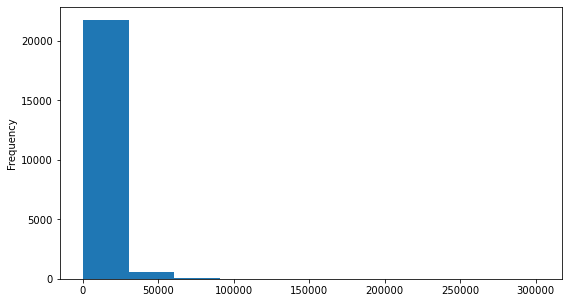

In [9]:
plt.figure(figsize = (9, 5)) 
train['TARGET_IN_EA'].plot(kind ="hist") 

<AxesSubplot:ylabel='Frequency'>

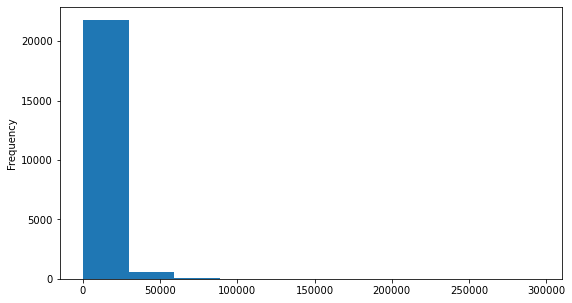

In [10]:
plt.figure(figsize = (9, 5)) 
train['ACH_IN_EA'].plot(kind ="hist") 

<AxesSubplot:>

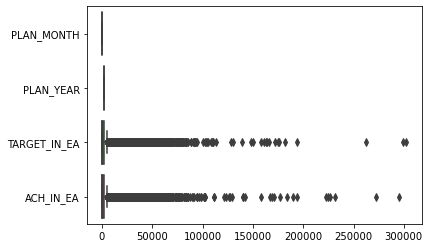

In [11]:
sns.boxplot(data=train,orient="h")

In [12]:
# sns.pairplot(train,height=1.5)

Check instance where salesman has achieved target

In [13]:
train['comparison'] = np.where(train['TARGET_IN_EA'] <= train['ACH_IN_EA'], True, False)
train['comparison'].value_counts()

True     11702
False    10767
Name: comparison, dtype: int64

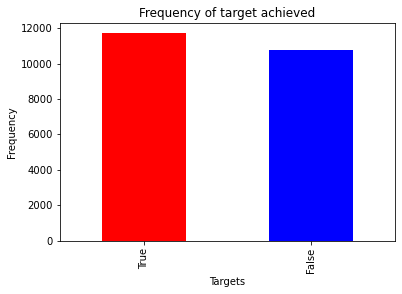

In [14]:
ax = train['comparison'].value_counts().plot(kind='bar',title="Frequency of target achieved",color=['r','b'])
ax.set_xlabel("Targets")
ax.set_ylabel("Frequency")
plt.show()

# Grouping Data

1. details on Products assigned for salesman

In [15]:
groupdata1 = train[['SLSMAN_CD','PROD_CD']]
group1 = groupdata1.groupby('SLSMAN_CD')
group1.head()

groupunique1 = group1.apply(lambda x: x['PROD_CD'].unique())
groupunique1
# For particular products
print("Salesman1 produts:\n", groupunique1.SLSMAN_1)
print("Salesman2 produts:\n", groupunique1.SLSMAN_2)

Salesman1 produts:
 ['PROD_3' 'PROD_5' 'PROD_8' 'PROD_10' 'PROD_11' 'PROD_13' 'PROD_14'
 'PROD_15' 'PROD_16' 'PROD_17' 'PROD_18' 'PROD_19' 'PROD_21' 'PROD_22'
 'PROD_23' 'PROD_25' 'PROD_26' 'PROD_27' 'PROD_31' 'PROD_32' 'PROD_33'
 'PROD_35' 'PROD_36' 'PROD_37' 'PROD_38' 'PROD_39' 'PROD_42' 'PROD_43'
 'PROD_45' 'PROD_47' 'PROD_48' 'PROD_50' 'PROD_51' 'PROD_56' 'PROD_58'
 'PROD_59' 'PROD_61' 'PROD_62' 'PROD_66' 'PROD_74' 'PROD_76' 'PROD_80'
 'PROD_81' 'PROD_82' 'PROD_83' 'PROD_84' 'PROD_85' 'PROD_86']
Salesman2 produts:
 ['PROD_3' 'PROD_5' 'PROD_10' 'PROD_11' 'PROD_13' 'PROD_14' 'PROD_15'
 'PROD_16' 'PROD_17' 'PROD_18' 'PROD_19' 'PROD_22' 'PROD_23' 'PROD_25'
 'PROD_26' 'PROD_27' 'PROD_31' 'PROD_32' 'PROD_33' 'PROD_35' 'PROD_36'
 'PROD_37' 'PROD_38' 'PROD_39' 'PROD_42' 'PROD_43' 'PROD_45' 'PROD_47'
 'PROD_49' 'PROD_50' 'PROD_51' 'PROD_56' 'PROD_58' 'PROD_59' 'PROD_61'
 'PROD_62' 'PROD_74' 'PROD_76' 'PROD_80' 'PROD_81' 'PROD_82' 'PROD_83'
 'PROD_84' 'PROD_85' 'PROD_86']


2. Salesman assigned for each products

In [16]:
groupdata2 = train[['SLSMAN_CD','PROD_CD']]
group2 = groupdata2.groupby('PROD_CD')
group2.head()

groupunique2 = group2.apply(lambda x: x['SLSMAN_CD'].unique())
groupunique2

# For particular products
print("Produt1 Salesman are:\n", groupunique2.PROD_1)
print("Produt2 Salesman are:\n", groupunique2.PROD_2)


Produt1 Salesman are:
 ['SLSMAN_130' 'SLSMAN_188' 'SLSMAN_189' 'SLSMAN_223' 'SLSMAN_224']
Produt2 Salesman are:
 ['SLSMAN_13' 'SLSMAN_14' 'SLSMAN_16' 'SLSMAN_41' 'SLSMAN_42' 'SLSMAN_52'
 'SLSMAN_54' 'SLSMAN_58' 'SLSMAN_60' 'SLSMAN_62' 'SLSMAN_63' 'SLSMAN_92'
 'SLSMAN_94' 'SLSMAN_99' 'SLSMAN_103' 'SLSMAN_107' 'SLSMAN_115'
 'SLSMAN_117' 'SLSMAN_124' 'SLSMAN_127' 'SLSMAN_128' 'SLSMAN_142'
 'SLSMAN_143' 'SLSMAN_146' 'SLSMAN_148' 'SLSMAN_163' 'SLSMAN_164'
 'SLSMAN_166' 'SLSMAN_170' 'SLSMAN_180' 'SLSMAN_183' 'SLSMAN_184'
 'SLSMAN_191' 'SLSMAN_194' 'SLSMAN_197' 'SLSMAN_198' 'SLSMAN_211']


In [17]:
train = train.drop(['comparison'],axis=1)
train.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173


# Categorical variable to numeric

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train['PROD_CD'] = label_encoder.fit_transform(train['PROD_CD'])
train['SLSMAN_CD'] = label_encoder.fit_transform(train['SLSMAN_CD'])
train.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,22,0,10,2019,80,0
1,22,0,11,2019,80,0
2,22,0,12,2019,40,0
3,44,0,10,2019,160,211
4,44,0,11,2019,160,173


# Train test split for training data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('ACH_IN_EA', axis=1), train['ACH_IN_EA'], 
                                                    test_size=0.3, random_state=101)

# Feature Scaling or Standardization

In [20]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

# Developing Model

# 1. LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
print(LR)

LinearRegression()


In [22]:
LR_score = LR.score(X_train,y_train)  
print("LinearModel Accuracy score: ", LR_score*100)  # 76.74%
print("Intercept:",LR.intercept_)
print("Coefficient:",LR.coef_)

LinearModel Accuracy score:  76.74453817741271
Intercept: [1.82459743e-17]
Coefficient: [[0.01270593 0.00677188 0.00113326 0.         0.87698191]]


In [23]:
LR.score(X_test,y_test)

0.8150058021241783

In [24]:
predictions = LR.predict(X_test)
predictions= predictions.reshape(-1,1)

In [25]:
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, predictions))
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, predictions))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Linear Regression MAE: 0.13832326409558382
Linear Regression MSE: 0.18499419787582172
Linear Regression RMSE: 0.430109518466892


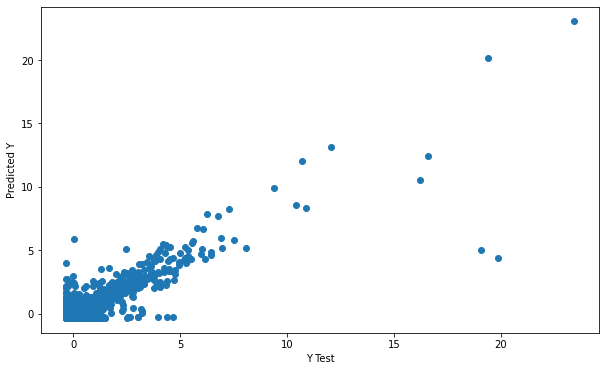

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# 2.Gradient Boosting Regression


In [27]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
params = {'n_estimators': 1500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

GBR.fit(X_train, y_train)

C:\Users\Dipsikha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=1500)

In [29]:
GBR_pred=GBR.predict(X_test)
GBR_pred= GBR_pred.reshape(-1,1)

In [30]:
GBR_score = GBR.score(X_train,y_train)  
print("GradientBoostingRegressor Accuracy score: ", GBR_score*100)

GradientBoostingRegressor Accuracy score:  96.96005987558152


In [31]:
GBR.score(X_test,y_test) 

0.86634485415087

In [32]:
print('Gradient Boosting Regression MAE:', metrics.mean_absolute_error(y_test, GBR_pred))
print('Gradient Boosting Regression MSE:', metrics.mean_squared_error(y_test, GBR_pred))
print('Gradient Boosting Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GBR_pred)))

Gradient Boosting Regression MAE: 0.111097582836039
Gradient Boosting Regression MSE: 0.13365514584913
Gradient Boosting Regression RMSE: 0.3655887660324507


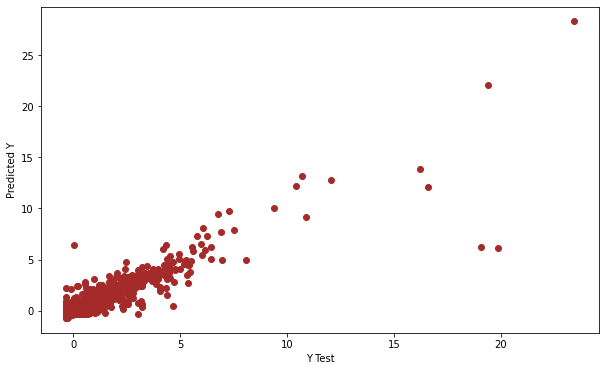

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,GBR_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

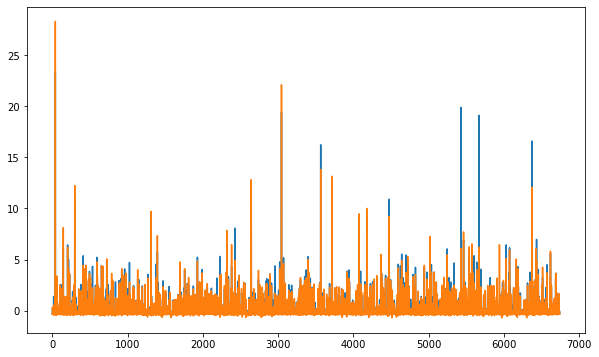

In [34]:
plt.figure(figsize=(10,6))
plt.plot(y_test,label ='Test')
plt.plot(GBR_pred, label = 'predict')
plt.show()

# 3. Decision Tree Regression 


In [35]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100,criterion='mse',splitter='best',min_samples_split=100,
                              min_samples_leaf=10,
                              min_impurity_decrease=0.0,min_impurity_split=0.0)
dtreg.fit(X_train, y_train)

C:\Users\Dipsikha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


DecisionTreeRegressor(min_impurity_split=0.0, min_samples_leaf=10,
                      min_samples_split=100, random_state=100)

In [36]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [37]:
dtreg_score = dtreg.score(X_train,y_train)  
print("DecisionTreeRegressor Accuracy score: ", dtreg_score*100)

DecisionTreeRegressor Accuracy score:  79.5145818248244


In [38]:
dtreg.score(X_test,y_test)

0.7761017178059293

In [39]:
print('Decision Tree Regression MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('Decision Tree Regression MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('Decision Tree Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

Decision Tree Regression MAE: 0.13081871576146512
Decision Tree Regression MSE: 0.2238982821940708
Decision Tree Regression RMSE: 0.47317891140040336


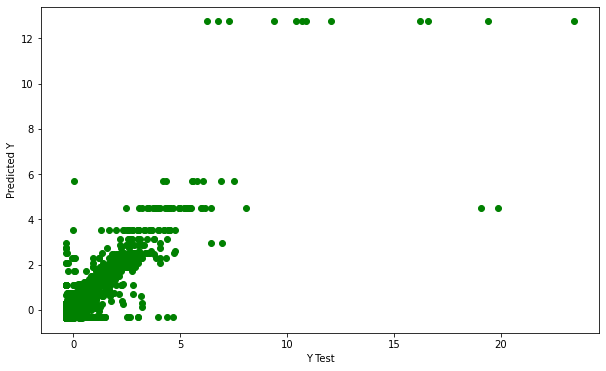

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# 4. Support Vector Machine Regression 

In [41]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=1e3, gamma = 0.5, epsilon = 0.01)
svr.fit(X_train, y_train)

C:\Users\Dipsikha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1000.0, epsilon=0.01, gamma=0.5)

In [42]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [43]:
print('SVM MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('SVM MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

SVM MAE: 0.141822612630144
SVM MSE: 0.43020281417657946
SVM RMSE: 0.6558984785594334


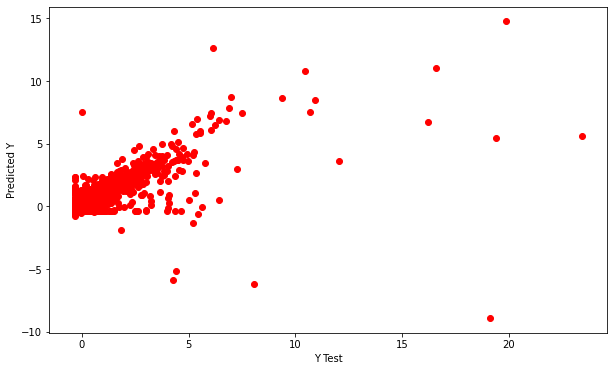

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# 5. Random Forest Regression 

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
rfr.fit(X_train, y_train)

C:\Users\Dipsikha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=2500, n_jobs=1,
                      random_state=0)

In [46]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [47]:
rfr.score(X_train,y_train)

0.9392496195932089

In [48]:
rfr.score(X_test,y_test)

0.8333128070638143

In [49]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('Random Forest Regression MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('Random Forest Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

Random Forest Regression MAE: 0.09676456241087969
Random Forest Regression MSE: 0.1666871929361857
Random Forest Regression RMSE: 0.4082734291332044


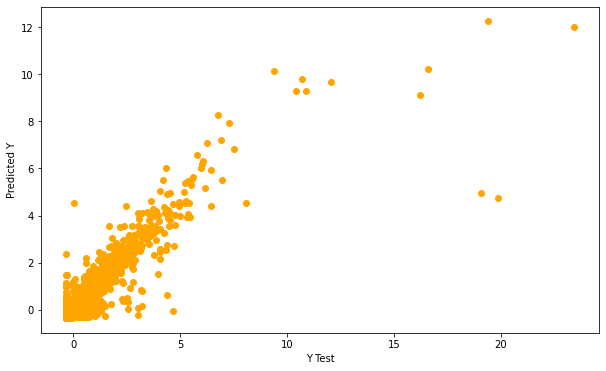

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# 6. LightGBM 

In [51]:
import lightgbm as lgb

In [52]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [53]:
model_lgb.fit(X_train,y_train)

C:\Users\Dipsikha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=500,
              num_leaves=5, objective='regression')

In [54]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

In [55]:
print('LightGBM MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('LightGBM MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('LightGBM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

LightGBM MAE: 0.2933848097468546
LightGBM MSE: 0.65056969996636
LightGBM RMSE: 0.8065790103680854


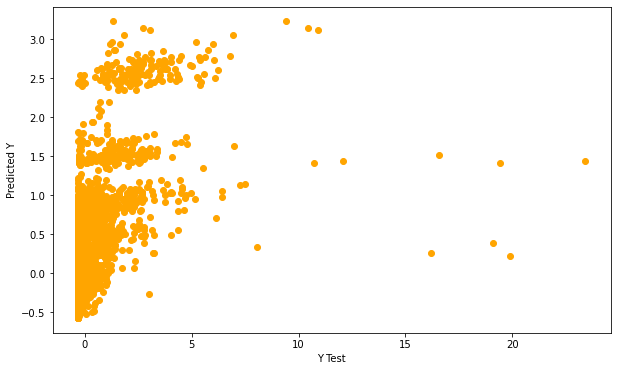

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# 7. XGBoost Regressor

In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()
parameters = {'objective':['reg:linear'],'learning_rate':[0.03,0.05,0.07],'max_depth':[5,6,7],'min_child_weight':[4],'subsample':[0.7],
              'colsample_bytree':[0.7],'colsample_bylevel':[0.7],'alpha':[0.05],'lambda':[0.3],'n_estimators':[1500]}
XGB = GridSearchCV(xgb,parameters,cv = 2)
XGB.fit(X_train,y_train)

[13:01:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             pa

In [58]:
xgb_score = XGB.score(X_train,y_train)  
print("Training score: ", xgb_score*100)

Training score:  96.89829480619706


In [59]:
XGB.score(X_test,y_test) 

0.849367102013566

In [60]:
xgb_pred=XGB.predict(X_test)
xgb_pred= xgb_pred.reshape(-1,1)
XGB_Accuracy = "{:.2f} %".format(XGB.score(X_train,y_train)*100)
print("Accuracy: ",XGB_Accuracy)

Accuracy:  96.90 %


In [61]:
print('XGBoost MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('XGBoost MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('XGBoost RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

XGBoost MAE: 0.1263095982640963
XGBoost MSE: 0.150632897986434
XGBoost RMSE: 0.38811454235371545


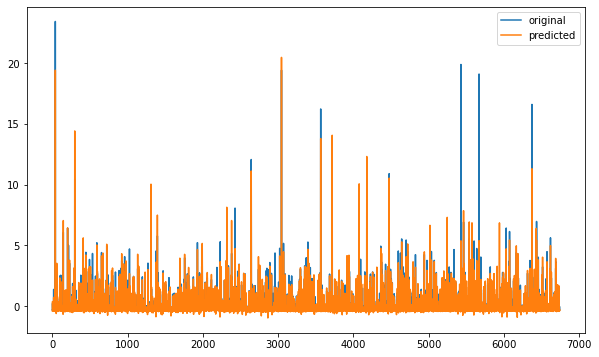

In [62]:
x_ax = range(len(y_test))
plt.figure(figsize=(10,6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, xgb_pred, label="predicted")
plt.legend()
plt.show()


# Model Comparison

In [63]:
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, predictions))
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, predictions))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Linear Regression MAE: 0.13832326409558382
Linear Regression MSE: 0.18499419787582172
Linear Regression RMSE: 0.430109518466892


In [64]:
print('Gradient Boosting Regression MAE:', metrics.mean_absolute_error(y_test, GBR_pred))
print('Gradient Boosting Regression MSE:', metrics.mean_squared_error(y_test, GBR_pred))
print('Gradient Boosting Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GBR_pred)))

Gradient Boosting Regression MAE: 0.111097582836039
Gradient Boosting Regression MSE: 0.13365514584913
Gradient Boosting Regression RMSE: 0.3655887660324507


In [65]:
print('Decision Tree Regression MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('Decision Tree Regression MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('Decision Tree Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

Decision Tree Regression MAE: 0.13081871576146512
Decision Tree Regression MSE: 0.2238982821940708
Decision Tree Regression RMSE: 0.47317891140040336


In [66]:
print('SVM MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('SVM MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

SVM MAE: 0.141822612630144
SVM MSE: 0.43020281417657946
SVM RMSE: 0.6558984785594334


In [67]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('Random Forest Regression MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('Random Forest Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

Random Forest Regression MAE: 0.09676456241087969
Random Forest Regression MSE: 0.1666871929361857
Random Forest Regression RMSE: 0.4082734291332044


In [68]:
print('LightGBM MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('LightGBM MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('LightGBM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

LightGBM MAE: 0.2933848097468546
LightGBM MSE: 0.65056969996636
LightGBM RMSE: 0.8065790103680854


In [69]:
print('XGBoost MAE:', metrics.mean_absolute_error(y_test, xgb_pred))
print('XGBoost MSE:', metrics.mean_squared_error(y_test, xgb_pred))
print('XGBoost RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

XGBoost MAE: 0.1263095982640963
XGBoost MSE: 0.150632897986434
XGBoost RMSE: 0.38811454235371545


In [70]:
comparision = {'Model':['Linear Regression','Gradient Boosting Regression','Decision Tree Regression','support vector machine',
                       'Random Forest Regression','LightGBM','XGBoost'],
              'Mean_Absolute_Error':[metrics.mean_absolute_error(y_test, predictions),metrics.mean_absolute_error(y_test, GBR_pred),metrics.mean_absolute_error(y_test, dtr_pred),
                                    metrics.mean_absolute_error(y_test, svr_pred),metrics.mean_absolute_error(y_test, rfr_pred),metrics.mean_absolute_error(y_test, lgb_pred),metrics.mean_absolute_error(y_test, xgb_pred)],
              'mean_squared_error':[metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, GBR_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),
                                    metrics.mean_squared_error(y_test, rfr_pred),metrics.mean_squared_error(y_test, lgb_pred),metrics.mean_squared_error(y_test, xgb_pred)],
               'RMSE':[np.sqrt(metrics.mean_squared_error(y_test, predictions)),np.sqrt(metrics.mean_squared_error(y_test, GBR_pred)),np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)),np.sqrt(metrics.mean_squared_error(y_test, svr_pred)),
                      np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)),np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)),np.sqrt(metrics.mean_squared_error(y_test, xgb_pred))]}
comparision= pd.DataFrame.from_dict(comparision)
comparision

,Model,Mean_Absolute_Error,mean_squared_error,RMSE
0,Linear Regression,0.138323,0.184994,0.430110
1,Gradient Boosting Regression,0.111098,0.133655,0.365589
2,Decision Tree Regression,0.130819,0.223898,0.473179
3,support vector machine,0.141823,0.430203,0.655898
4,Random Forest Regression,0.096765,0.166687,0.408273
5,LightGBM,0.293385,0.650570,0.806579
6,XGBoost,0.126310,0.150633,0.388115


In [71]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),
                     metrics.mean_squared_error(y_test, GBR_pred),
                     metrics.mean_squared_error(y_test, dtr_pred),
                     metrics.mean_squared_error(y_test, svr_pred),
                     metrics.mean_squared_error(y_test, rfr_pred),
                    metrics.mean_squared_error(y_test, lgb_pred),
                    metrics.mean_squared_error(y_test, xgb_pred)])
error_rate

array([0.1849942 , 0.13365515, 0.22389828, 0.43020281, 0.16668719,
       0.6505697 , 0.1506329 ])

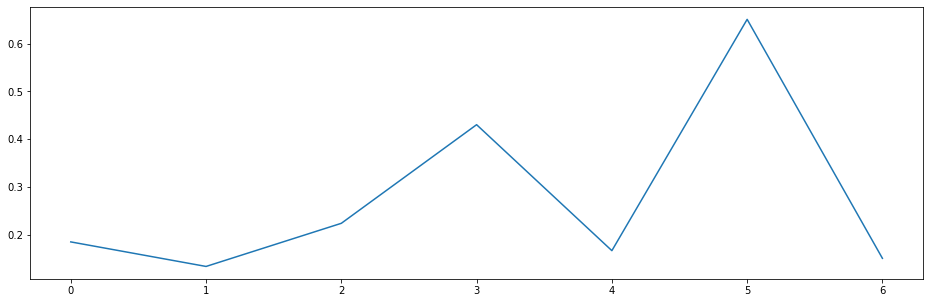

In [72]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

We can say the best working model by loking MSE rates.The best working model is Gradient Boosting Regression (MSE:	0.161156) or Random Forest Regression (MSE:	0.161116).

Now we will use test data .



In [73]:
test1 = pd.read_csv("future_sales_data_csv.csv")
test1.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,1,2020,40,0
1,PROD_5,SLSMAN_1,1,2020,240,0
2,PROD_11,SLSMAN_1,1,2020,360,0
3,PROD_13,SLSMAN_1,1,2020,"12,816",0
4,PROD_14,SLSMAN_1,1,2020,"44,460",0


In [74]:
test1['TARGET_IN_EA']= test1['TARGET_IN_EA'].str.replace(',','').astype(int)

In [75]:
test1 = test1.drop(['ACH_IN_EA'],axis=1)
test = test1.copy(deep=True)

In [76]:
from sklearn.preprocessing import LabelEncoder
test['PROD_CD'] = label_encoder.fit_transform(test['PROD_CD'])
test['SLSMAN_CD'] = label_encoder.fit_transform(test['SLSMAN_CD'])
test.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA
0,17,0,1,2020,40
1,33,0,1,2020,240
2,0,0,1,2020,360
3,2,0,1,2020,12816
4,3,0,1,2020,44460


In [77]:
test = sc_X.fit_transform(test)

# 1. Predicting using Gradient Boosting Regression

In [78]:
test_prediction_GBR=GBR.predict(test)
test_prediction_GBR= test_prediction_GBR.reshape(-1,1)

In [79]:
test_prediction_GBR

array([[-0.00996747],
       [-0.09963419],
       [-0.16459168],
       ...,
       [-0.19988404],
       [-0.23991695],
       [-0.20014975]])

In [80]:
test_prediction_GBR =sc_y.inverse_transform(test_prediction_GBR)

In [81]:
test_prediction_GBR = pd.DataFrame(test_prediction_GBR, columns=['GBR_ACH_IN_EA'])

In [82]:
result = pd.concat([test1,test_prediction_GBR], axis=1)
result.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,GBR_ACH_IN_EA
0,PROD_3,SLSMAN_1,1,2020,40,3642.179313
1,PROD_5,SLSMAN_1,1,2020,240,2612.445764
2,PROD_11,SLSMAN_1,1,2020,360,1866.473242
3,PROD_13,SLSMAN_1,1,2020,12816,8093.929611
4,PROD_14,SLSMAN_1,1,2020,44460,40610.495065


# 2. Predicting using Random Forest Regression

In [83]:
test_prediction_RFR=rfr.predict(test)
test_prediction_RFR= test_prediction_RFR.reshape(-1,1)

In [84]:
test_prediction_RFR

array([[-0.21583203],
       [-0.14880843],
       [-0.27708415],
       ...,
       [-0.21486717],
       [-0.31586595],
       [-0.24106413]])

In [85]:
test_prediction_RFR =sc_y.inverse_transform(test_prediction_RFR)

In [86]:
test_prediction_RFR = pd.DataFrame(test_prediction_RFR, columns=['RFR_ACH_IN_EA'])

In [87]:
result = pd.concat([result,test_prediction_RFR], axis=1)
result.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,GBR_ACH_IN_EA,RFR_ACH_IN_EA
0,PROD_3,SLSMAN_1,1,2020,40,3642.179313,1278.028534
1,PROD_5,SLSMAN_1,1,2020,240,2612.445764,2047.728293
2,PROD_11,SLSMAN_1,1,2020,360,1866.473242,574.608512
3,PROD_13,SLSMAN_1,1,2020,12816,8093.929611,7203.664542
4,PROD_14,SLSMAN_1,1,2020,44460,40610.495065,28158.309630


# 3. XGBoost Regression

In [88]:
test_prediction_XGB= XGB.predict(test)
test_prediction_XGB= test_prediction_XGB.reshape(-1,1)

In [89]:
test_prediction_XGB

array([[ 0.01349553],
       [-0.10789722],
       [-0.23254961],
       ...,
       [-0.23767442],
       [-0.23658037],
       [-0.1947056 ]], dtype=float32)

In [90]:
test_prediction_XGB =sc_y.inverse_transform(test_prediction_XGB)
test_prediction_XGB

array([[3911.6287],
       [2517.553 ],
       [1086.0436],
       ...,
       [1027.1903],
       [1039.7543],
       [1520.6447]], dtype=float32)

In [91]:
test_prediction_XGB = pd.DataFrame(test_prediction_XGB, columns=['XGB_ACH_IN_EA'])

In [92]:
result = pd.concat([result,test_prediction_XGB], axis=1)
result.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,GBR_ACH_IN_EA,RFR_ACH_IN_EA,XGB_ACH_IN_EA
0,PROD_3,SLSMAN_1,1,2020,40,3642.179313,1278.028534,3911.628662
1,PROD_5,SLSMAN_1,1,2020,240,2612.445764,2047.728293,2517.552979
2,PROD_11,SLSMAN_1,1,2020,360,1866.473242,574.608512,1086.043579
3,PROD_13,SLSMAN_1,1,2020,12816,8093.929611,7203.664542,7945.514160
4,PROD_14,SLSMAN_1,1,2020,44460,40610.495065,28158.309630,32995.289062


# EDA,PreProcessing of new January data

In [93]:
new3 = result[['PROD_CD','SLSMAN_CD','PLAN_MONTH','PLAN_YEAR','TARGET_IN_EA','GBR_ACH_IN_EA']]

In [94]:
new3.shape

(5839, 6)

In [95]:
new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROD_CD        5839 non-null   object 
 1   SLSMAN_CD      5839 non-null   object 
 2   PLAN_MONTH     5839 non-null   int64  
 3   PLAN_YEAR      5839 non-null   int64  
 4   TARGET_IN_EA   5839 non-null   int32  
 5   GBR_ACH_IN_EA  5839 non-null   float64
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 251.0+ KB


In [96]:
new3.describe()

,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,GBR_ACH_IN_EA
count,5839.0,5839.0,5839.000000,5839.000000
mean,1.0,2020.0,5323.620997,3973.628227
std,0.0,0.0,13229.767694,10767.562545
min,1.0,2020.0,6.000000,-5375.688975
25%,1.0,2020.0,144.000000,-242.024762
50%,1.0,2020.0,600.000000,779.955342
75%,1.0,2020.0,4062.000000,3240.617317
max,1.0,2020.0,299208.000000,250511.011974


In [97]:
new3.isnull().sum()

PROD_CD          0
SLSMAN_CD        0
PLAN_MONTH       0
PLAN_YEAR        0
TARGET_IN_EA     0
GBR_ACH_IN_EA    0
dtype: int64

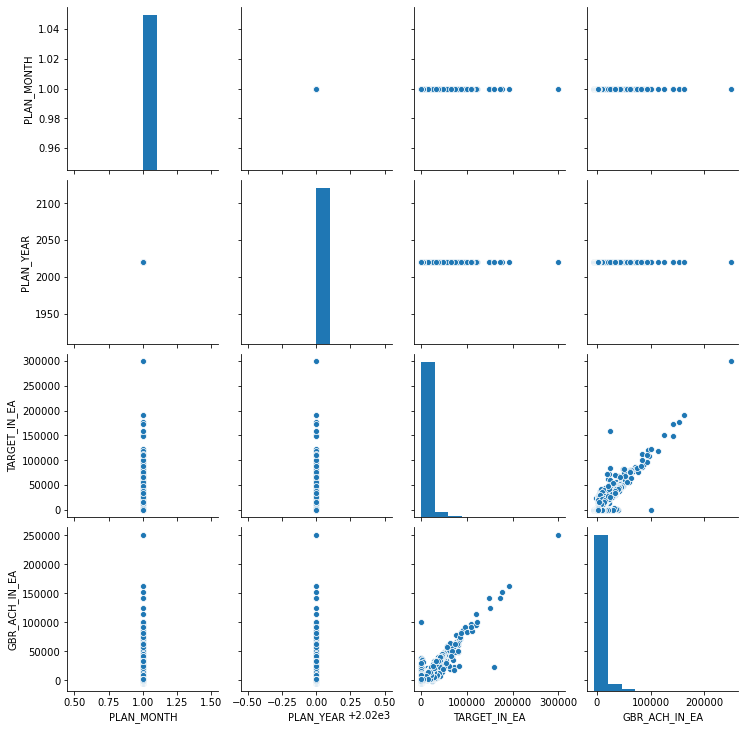

In [98]:
sns.pairplot(new3)

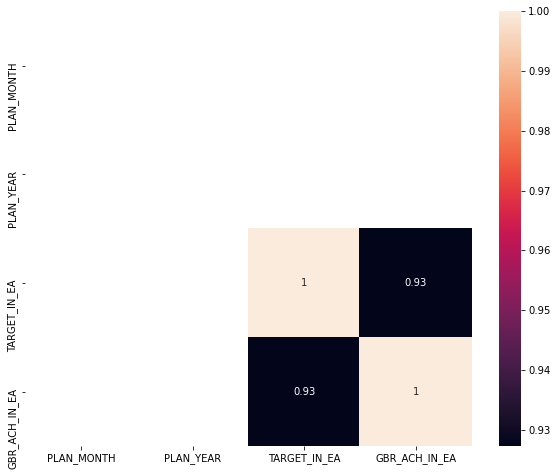

In [100]:
plt.figure(figsize=(10,8))
sns.heatmap(data=new3.corr(),annot=True)
plt.show()

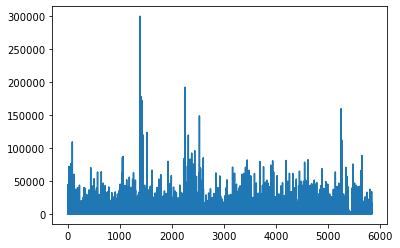

In [101]:
plt.plot(new3['TARGET_IN_EA'])

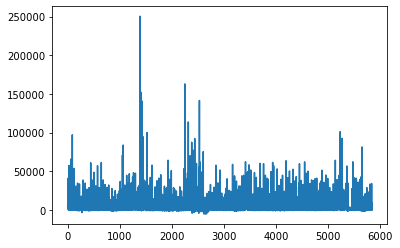

In [102]:
plt.plot(new3['GBR_ACH_IN_EA'])

C:\Users\Dipsikha\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='PROD_CD'>

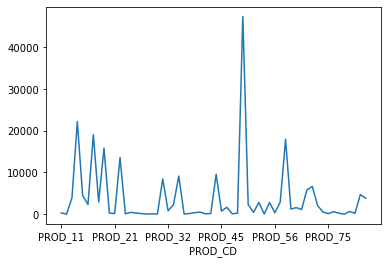

In [103]:
new3.groupby('PROD_CD')['TARGET_IN_EA'].mean().plot()

C:\Users\Dipsikha\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='PROD_CD'>

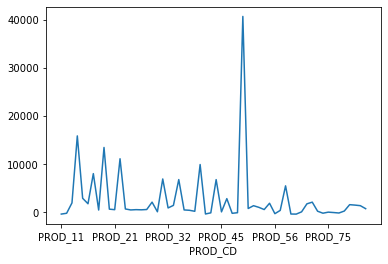

In [104]:
new3.groupby('PROD_CD')['GBR_ACH_IN_EA'].mean().plot()

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

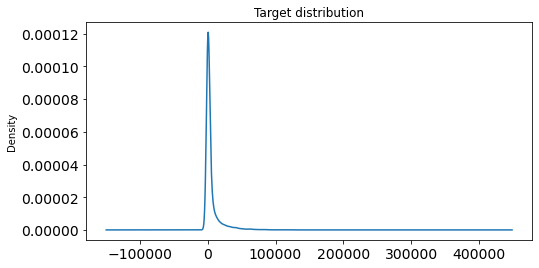

In [105]:
new3['TARGET_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

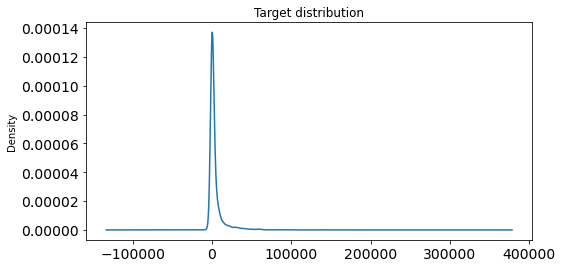

In [106]:
new3['GBR_ACH_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

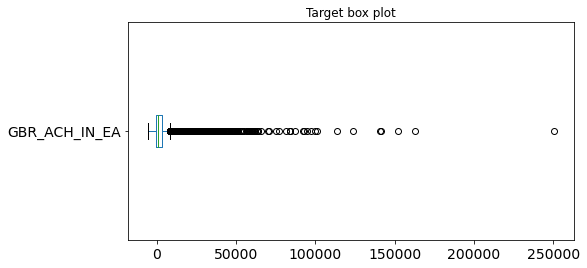

In [107]:
box_plot = new3['GBR_ACH_IN_EA'].plot(kind = 'box',vert = False,fontsize = 14,title = 'Target box plot',figsize = (8,4))

In [108]:
new3['GBR_ACH_IN_EA']=new3['GBR_ACH_IN_EA'].astype(int)

C:\Users\Dipsikha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [109]:
new3.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,GBR_ACH_IN_EA
0,PROD_3,SLSMAN_1,1,2020,40,3642
1,PROD_5,SLSMAN_1,1,2020,240,2612
2,PROD_11,SLSMAN_1,1,2020,360,1866
3,PROD_13,SLSMAN_1,1,2020,12816,8093
4,PROD_14,SLSMAN_1,1,2020,44460,40610


In [110]:
new3.rename(columns={'GBR_ACH_IN_EA':'ACH_IN_EA'},inplace=True)

C:\Users\Dipsikha\anaconda3\lib\site-packages\pandas\core\frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
from sklearn.preprocessing import LabelEncoder
new3['PROD_CD'] = label_encoder.fit_transform(new3['PROD_CD'])
new3['SLSMAN_CD'] = label_encoder.fit_transform(new3['SLSMAN_CD'])
new3.head()

C:\Users\Dipsikha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dipsikha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,17,0,1,2020,40,3642
1,33,0,1,2020,240,2612
2,0,0,1,2020,360,1866
3,2,0,1,2020,12816,8093
4,3,0,1,2020,44460,40610


In [112]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(new3['TARGET_IN_EA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.423, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\Dipsikha\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [114]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(new3['ACH_IN_EA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.432, p=0.000
Sample does not look Gaussian (reject H0)


In [115]:
final_data3= pd.concat([train,new3],axis=0)

In [116]:
final_data3

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,22,0,10,2019,80,0
1,22,0,11,2019,80,0
2,22,0,12,2019,40,0
3,44,0,10,2019,160,211
4,44,0,11,2019,160,173
...,...,...,...,...,...,...
5834,43,107,1,2020,1008,-615
5835,46,107,1,2020,3948,1254
5836,47,107,1,2020,4326,1461
5837,54,107,1,2020,936,1001


In [117]:
final_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28308 entries, 0 to 5838
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PROD_CD       28308 non-null  int32
 1   SLSMAN_CD     28308 non-null  int32
 2   PLAN_MONTH    28308 non-null  int64
 3   PLAN_YEAR     28308 non-null  int64
 4   TARGET_IN_EA  28308 non-null  int32
 5   ACH_IN_EA     28308 non-null  int32
dtypes: int32(4), int64(2)
memory usage: 1.1 MB


In [118]:
final_data3.describe()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
count,28308.000000,28308.000000,28308.000000,28308.000000,28308.000000,28308.000000
mean,31.983962,104.694927,8.968878,2019.206267,4106.393846,3767.670376
std,22.633760,64.474852,4.124582,0.404631,11355.023747,10642.168103
min,0.000000,0.000000,1.000000,2019.000000,0.000000,-5375.000000
25%,13.000000,48.000000,10.000000,2019.000000,40.000000,53.000000
50%,29.000000,101.000000,11.000000,2019.000000,300.000000,370.500000
75%,46.000000,160.000000,12.000000,2019.000000,2592.000000,2384.000000
max,85.000000,223.000000,12.000000,2020.000000,302400.000000,295578.000000


In [119]:
final_data3.isnull().sum()

PROD_CD         0
SLSMAN_CD       0
PLAN_MONTH      0
PLAN_YEAR       0
TARGET_IN_EA    0
ACH_IN_EA       0
dtype: int64

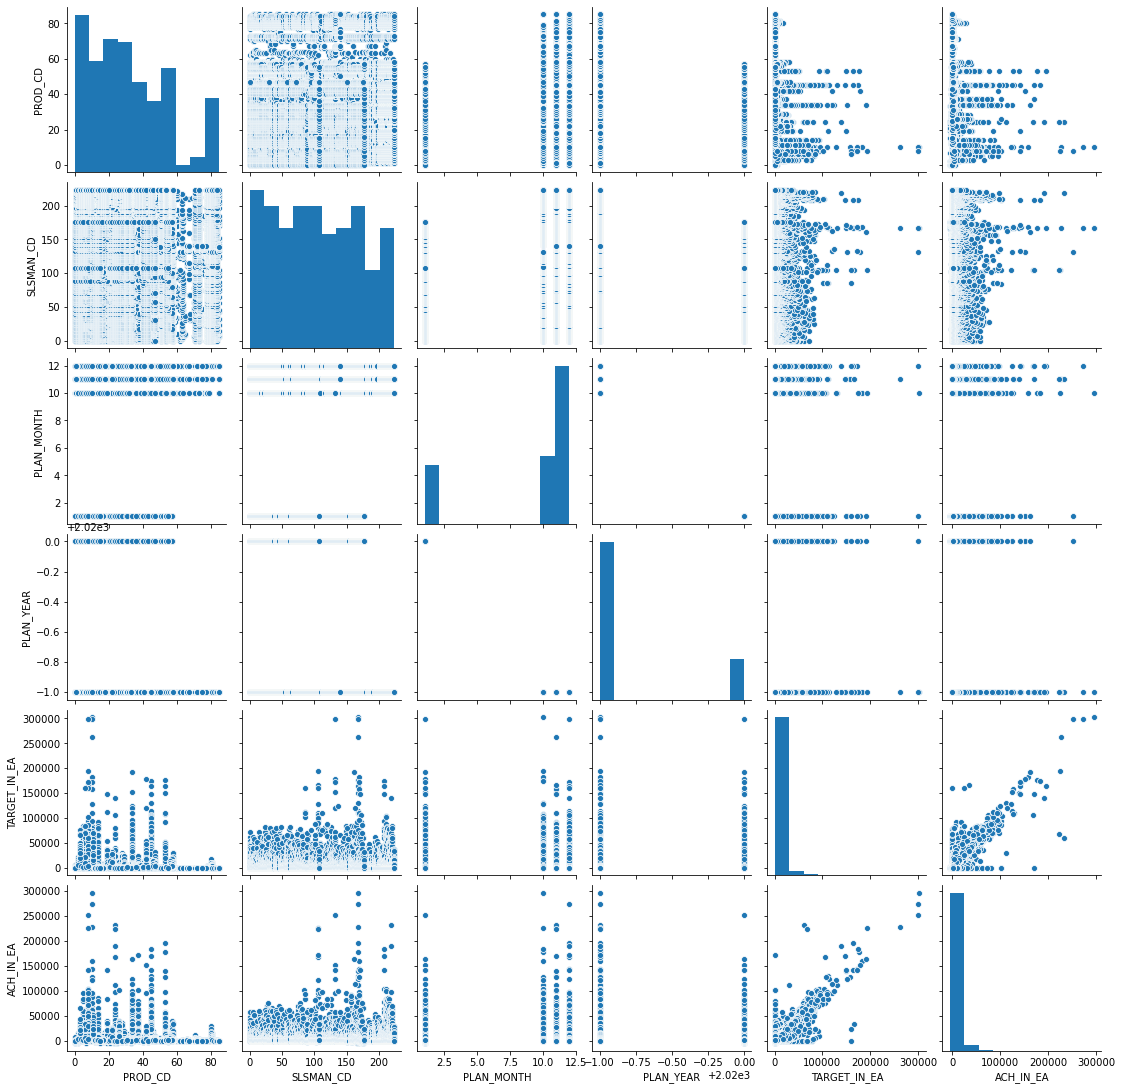

In [120]:
sns.pairplot(final_data3)

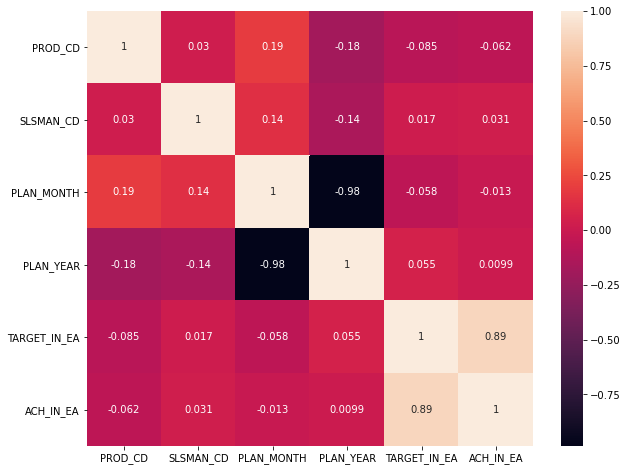

In [121]:
#### Correlation heatmap 

plt.figure(figsize=(10,8))
sns.heatmap(data=final_data3.corr(),annot=True)
plt.show()

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

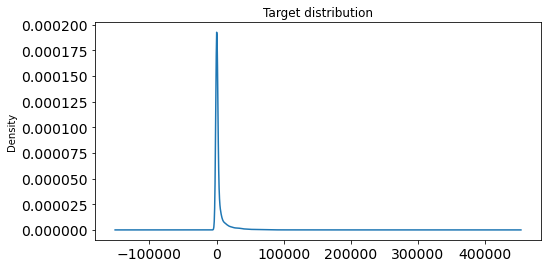

In [122]:
final_data3['TARGET_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

In [123]:
final_data1['ACH_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

NameError: name 'final_data1' is not defined

<AxesSubplot:title={'center':'Log Target Distribution'}, ylabel='Density'>

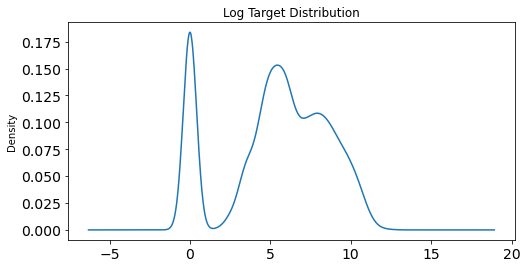

In [124]:
#### Seems like a normal distribution, we need a better visualization of this ####
pd.Series(np.log1p(final_data3['TARGET_IN_EA'])).plot(kind = 'density', title = 'Log Target Distribution', fontsize=14, figsize=(8,4))

<AxesSubplot:xlabel='PROD_CD'>

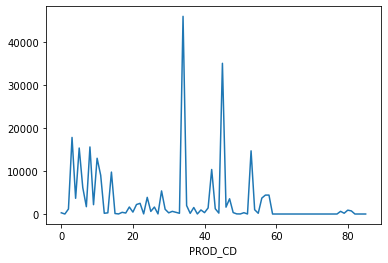

In [125]:
final_data3.groupby('PROD_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='PROD_CD'>

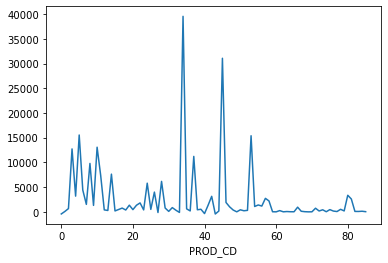

In [126]:
final_data3.groupby('PROD_CD')['ACH_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

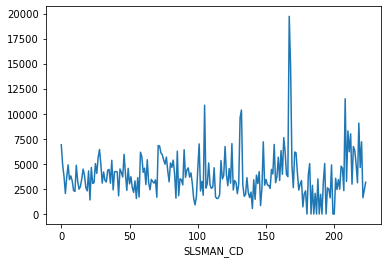

In [127]:
final_data3.groupby('SLSMAN_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

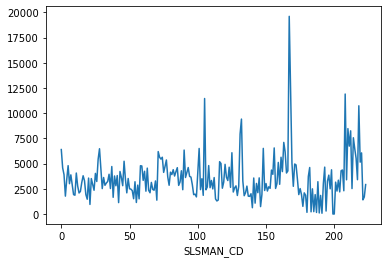

In [128]:
final_data3.groupby('SLSMAN_CD')['ACH_IN_EA'].mean().plot()

C:\Users\Dipsikha\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


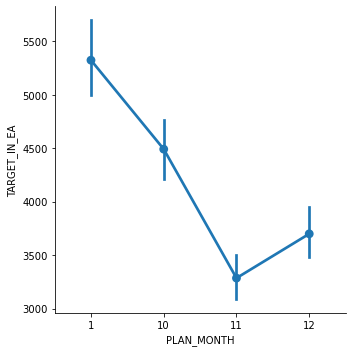

In [129]:
sns.factorplot(data = final_data3, x ="PLAN_MONTH", y = "TARGET_IN_EA")

C:\Users\Dipsikha\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


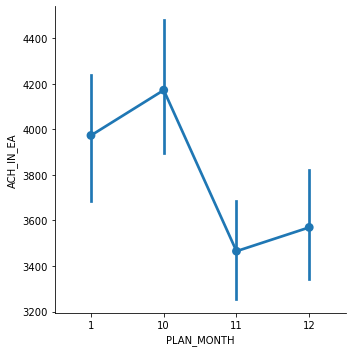

In [130]:
sns.factorplot(data = final_data3, x ="PLAN_MONTH", y = "ACH_IN_EA")

<AxesSubplot:xlabel='TARGET_IN_EA'>

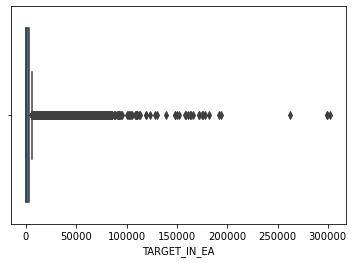

In [132]:
sns.boxplot(final_data3['TARGET_IN_EA'], data = final_data3)

<AxesSubplot:xlabel='ACH_IN_EA'>

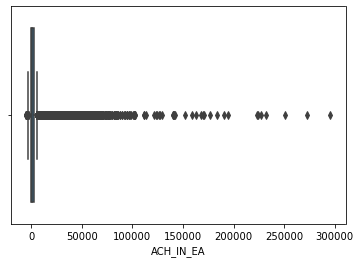

In [133]:
sns.boxplot(final_data3['ACH_IN_EA'], data = final_data3)

In [134]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(final_data3['ACH_IN_EA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.382, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\Dipsikha\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [135]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# normality test
stat, p = shapiro(final_data3['TARGET_IN_EA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.385, p=0.000
Sample does not look Gaussian (reject H0)


In [136]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(final_data3.drop('TARGET_IN_EA', axis=1), final_data3['TARGET_IN_EA'], 
                                                    test_size=0.3, random_state=101)

In [137]:
# we are going to scale to data

ytrain= ytrain.values.reshape(-1,1)
ytest= ytest.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
Xtrain = sc_X.fit_transform(Xtrain)
Xtest = sc_X.fit_transform(Xtest)
ytrain = sc_X.fit_transform(ytrain)
ytest = sc_y.fit_transform(ytest)

In [138]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(Xtrain,ytrain)
print(LR)

LinearRegression()


In [139]:
LR_score = LR.score(Xtrain,ytrain)  
print("LinearModel Accuracy score: ", LR_score*100)  # 76.74%
print("Intercept:",LR.intercept_)
print("Coefficient:",LR.coef_)

LinearModel Accuracy score:  78.35755624763023
Intercept: [-4.96944659e-16]
Coefficient: [[-0.02009114 -0.00274181 -0.03667764  0.00841812  0.8816848 ]]


In [140]:
LR.score(Xtest,ytest)

0.8308612056055996

In [141]:
predictions = LR.predict(Xtest)
predictions= predictions.reshape(-1,1)

In [142]:
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(ytest, predictions))
print('Linear Regression MSE:', metrics.mean_squared_error(ytest, predictions))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(ytest, predictions)))

Linear Regression MAE: 0.15440857539930686
Linear Regression MSE: 0.1691387943944004
Linear Regression RMSE: 0.4112648713352508


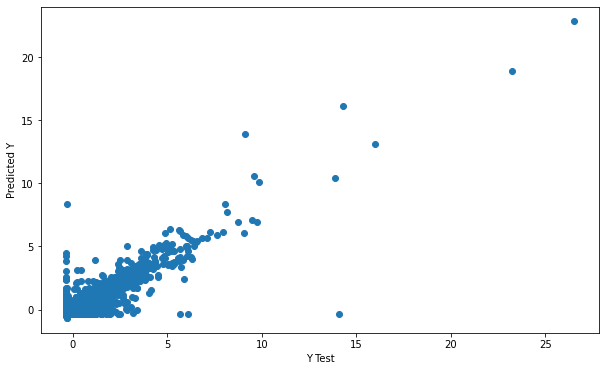

In [143]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [144]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score

In [145]:
params = {'n_estimators': 1500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

GBR.fit(Xtrain, ytrain)

C:\Users\Dipsikha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=1500)

In [146]:
GBR_pred=GBR.predict(Xtest)
GBR_pred= GBR_pred.reshape(-1,1)

In [147]:
GBR_score = GBR.score(Xtrain,ytrain)  
print("GradientBoostingRegressor Accuracy score: ", GBR_score*100)

GradientBoostingRegressor Accuracy score:  97.16853695763388


In [148]:
GBR.score(Xtest,ytest)

0.8825731685499407

In [149]:
print('Gradient Boosting Regression MAE:', metrics.mean_absolute_error(ytest, GBR_pred))
print('Gradient Boosting Regression MSE:', metrics.mean_squared_error(ytest, GBR_pred))
print('Gradient Boosting Regression RMSE:', np.sqrt(metrics.mean_squared_error(ytest, GBR_pred)))

Gradient Boosting Regression MAE: 0.11128928870163629
Gradient Boosting Regression MSE: 0.11742683145005929
Gradient Boosting Regression RMSE: 0.34267598610065936


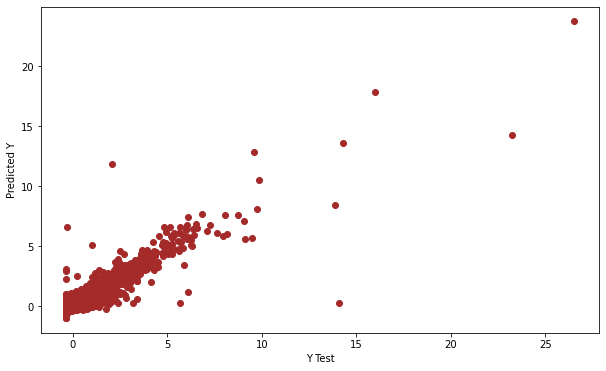

In [150]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,GBR_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

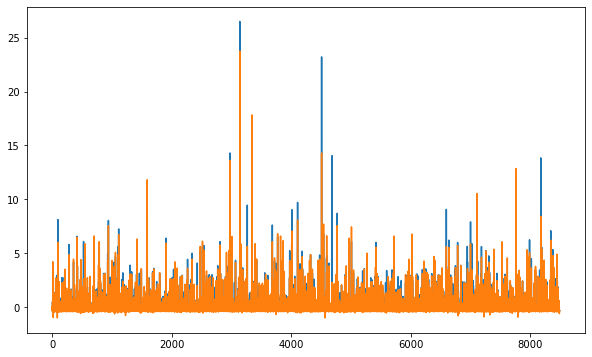

In [151]:
plt.figure(figsize=(10,6))
plt.plot(ytest,label ='Test')
plt.plot(GBR_pred, label = 'predict')
plt.show()

In [152]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100,criterion='mse',splitter='best',min_samples_split=100,
                              min_samples_leaf=10,
                              min_impurity_decrease=0.0,min_impurity_split=0.0)
dtreg.fit(Xtrain, ytrain)

C:\Users\Dipsikha\anaconda3\lib\site-packages\sklearn\tree\_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


DecisionTreeRegressor(min_impurity_split=0.0, min_samples_leaf=10,
                      min_samples_split=100, random_state=100)

In [153]:
dtr_pred = dtreg.predict(Xtest)
dtr_pred= dtr_pred.reshape(-1,1)

In [154]:
dtreg_score = dtreg.score(Xtrain,ytrain)  
print("DecisionTreeRegressor Accuracy score: ", dtreg_score*100)

DecisionTreeRegressor Accuracy score:  80.71705844937097


In [155]:
dtreg.score(Xtest,ytest)

0.7926701431647165

In [156]:
print('Decision Tree Regression MAE:', metrics.mean_absolute_error(ytest, dtr_pred))
print('Decision Tree Regression MSE:', metrics.mean_squared_error(ytest, dtr_pred))
print('Decision Tree Regression RMSE:', np.sqrt(metrics.mean_squared_error(ytest, dtr_pred)))

Decision Tree Regression MAE: 0.14137977622939002
Decision Tree Regression MSE: 0.2073298568352836
Decision Tree Regression RMSE: 0.4553348842723162


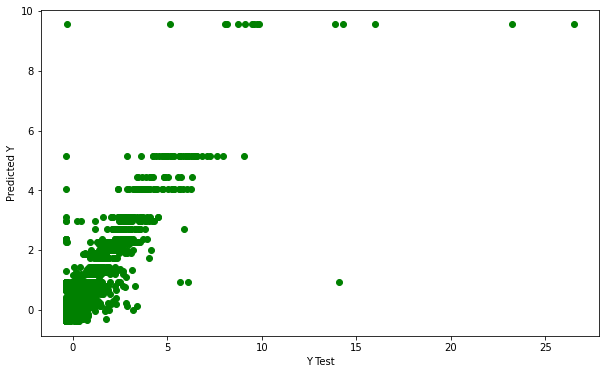

In [157]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [158]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
rfr.fit(Xtrain, ytrain)

C:\Users\Dipsikha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=2500, n_jobs=1,
                      random_state=0)

In [159]:
rfr_pred= rfr.predict(Xtest)
rfr_pred = rfr_pred.reshape(-1,1)

In [160]:
rfr.score(Xtrain,ytrain)

0.9504582376591546

In [161]:
rfr.score(Xtest,ytest)

0.8697920279459646

In [162]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(ytest, rfr_pred))
print('Random Forest Regression MSE:', metrics.mean_squared_error(ytest, rfr_pred))
print('Random Forest Regression RMSE:', np.sqrt(metrics.mean_squared_error(ytest, rfr_pred)))

Random Forest Regression MAE: 0.09793903316160811
Random Forest Regression MSE: 0.13020797205403545
Random Forest Regression RMSE: 0.36084341763988914


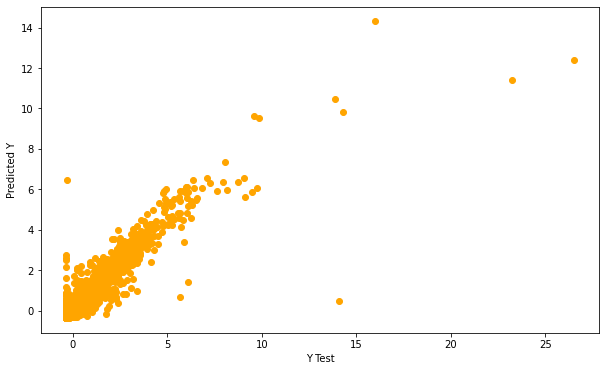

In [163]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [164]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()
parameters = {'objective':['reg:linear'],'learning_rate':[0.03,0.05,0.07],'max_depth':[5,6,7],'min_child_weight':[4],'subsample':[0.7],
              'colsample_bytree':[0.7],'colsample_bylevel':[0.7],'alpha':[0.05],'lambda':[0.3],'n_estimators':[1500]}
XGB = GridSearchCV(xgb,parameters,cv = 2)
XGB.fit(Xtrain,ytrain)

[13:30:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[13:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             pa

In [191]:
xgb_score = XGB.score(Xtrain,ytrain)  
print("Training score: ", xgb_score*100)

Training score:  98.94055282011628


In [192]:
XGB.score(Xtest,ytest) 

0.9103808319383997

In [203]:
xgb_pred2=XGB.predict(Xtest)
xgb_pred2= xgb_pred2.reshape(-1,1)
xgb_pred2

array([[ 0.48891369],
       [-0.35460794],
       [-0.6589397 ],
       ...,
       [-0.38850915],
       [-0.36322856],
       [-0.37708712]], dtype=float32)

In [204]:
print('XGBoost MAE:', metrics.mean_absolute_error(ytest, xgb_pred2))
print('XGBoost MSE:', metrics.mean_squared_error(ytest, xgb_pred2))
print('XGBoost RMSE:', np.sqrt(metrics.mean_squared_error(ytest, xgb_pred2)))

XGBoost MAE: 0.10539843571037198
XGBoost MSE: 0.08961916806160032
XGBoost RMSE: 0.29936460722937897


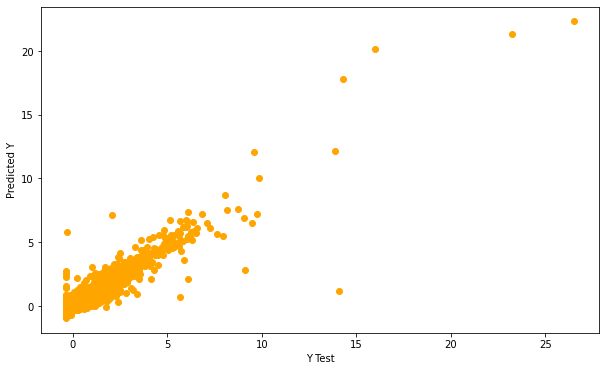

In [205]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,xgb_pred2, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [178]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=1e3, gamma = 0.5, epsilon = 0.01)
svr.fit(Xtrain, ytrain)

C:\Users\Dipsikha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1000.0, epsilon=0.01, gamma=0.5)

In [179]:
svr_pred = svr.predict(Xtest)
svr_pred= svr_pred.reshape(-1,1)

In [180]:
print('SVM MAE:', metrics.mean_absolute_error(ytest, svr_pred))
print('SVM MSE:', metrics.mean_squared_error(ytest, svr_pred))
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(ytest, svr_pred)))

SVM MAE: 0.12316272212752452
SVM MSE: 0.21122659385789866
SVM RMSE: 0.4595939445400675


In [181]:
svr.score(Xtrain,ytrain)

0.8930447081434467

In [182]:
svr.score(Xtest,ytest)

0.7887734061421015

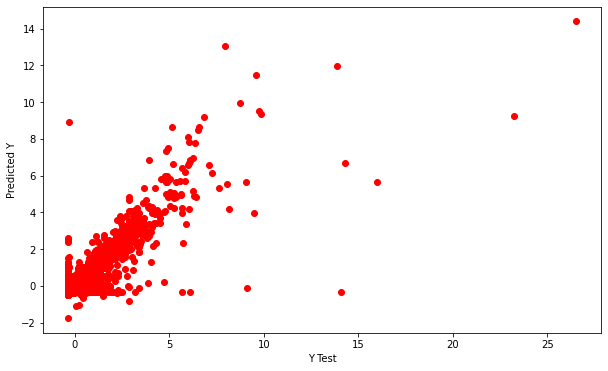

In [183]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [184]:
import lightgbm as lgb

In [185]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=5000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [186]:
model_lgb.fit(Xtrain,ytrain)

C:\Users\Dipsikha\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=5000,
              num_leaves=5, objective='regression')

In [187]:
lgb_pred = model_lgb.predict(Xtest)
lgb_pred = lgb_pred.reshape(-1,1)

In [188]:
print('LightGBM MAE:', metrics.mean_absolute_error(ytest, lgb_pred))
print('LightGBM MSE:', metrics.mean_squared_error(ytest, lgb_pred))
print('LightGBM RMSE:', np.sqrt(metrics.mean_squared_error(ytest, lgb_pred)))

LightGBM MAE: 0.3626567702142995
LightGBM MSE: 0.6985358389526312
LightGBM RMSE: 0.8357845649164808


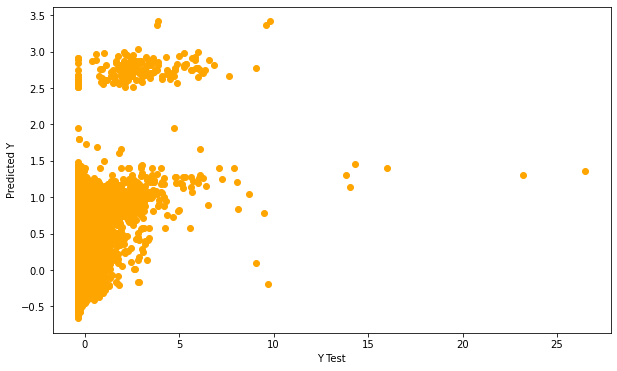

In [189]:
plt.figure(figsize=(10,6))
plt.scatter(ytest,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [206]:
comparision = {'Model':['Linear Regression','Gradient Boosting Regression','Decision Tree Regression','support vector machine',
                       'Random Forest Regression','LightGBM','XGBoost'],
              'Mean_Absolute_Error':[metrics.mean_absolute_error(ytest, predictions),metrics.mean_absolute_error(ytest, GBR_pred),metrics.mean_absolute_error(ytest, dtr_pred),
                                    metrics.mean_absolute_error(ytest, svr_pred),metrics.mean_absolute_error(ytest, rfr_pred),metrics.mean_absolute_error(ytest, lgb_pred),metrics.mean_absolute_error(ytest, xgb_pred2)],
              'mean_squared_error':[metrics.mean_squared_error(ytest, predictions),metrics.mean_squared_error(ytest, GBR_pred),metrics.mean_squared_error(ytest, dtr_pred),metrics.mean_squared_error(ytest, svr_pred),
                                    metrics.mean_squared_error(ytest, rfr_pred),metrics.mean_squared_error(ytest, lgb_pred),metrics.mean_squared_error(ytest, xgb_pred2)],
               'RMSE':[np.sqrt(metrics.mean_squared_error(ytest, predictions)),np.sqrt(metrics.mean_squared_error(ytest, GBR_pred)),np.sqrt(metrics.mean_squared_error(ytest, dtr_pred)),np.sqrt(metrics.mean_squared_error(ytest, svr_pred)),
                      np.sqrt(metrics.mean_squared_error(ytest, rfr_pred)),np.sqrt(metrics.mean_squared_error(ytest, lgb_pred)),np.sqrt(metrics.mean_squared_error(ytest, xgb_pred2))]}
comparision= pd.DataFrame.from_dict(comparision)
comparision

,Model,Mean_Absolute_Error,mean_squared_error,RMSE
0,Linear Regression,0.154409,0.169139,0.411265
1,Gradient Boosting Regression,0.111289,0.117427,0.342676
2,Decision Tree Regression,0.141380,0.207330,0.455335
3,support vector machine,0.123163,0.211227,0.459594
4,Random Forest Regression,0.097939,0.130208,0.360843
5,LightGBM,0.362657,0.698536,0.835785
6,XGBoost,0.105398,0.089619,0.299365


In [207]:
error_rate=np.array([metrics.mean_squared_error(ytest, predictions),
                     metrics.mean_squared_error(ytest, GBR_pred),
                     metrics.mean_squared_error(ytest, dtr_pred),
                     metrics.mean_squared_error(ytest, svr_pred),
                     metrics.mean_squared_error(ytest, rfr_pred),
                    metrics.mean_squared_error(ytest, lgb_pred),
                    metrics.mean_squared_error(ytest, xgb_pred2)])
error_rate

array([0.16913879, 0.11742683, 0.20732986, 0.21122659, 0.13020797,
       0.69853584, 0.08961917])

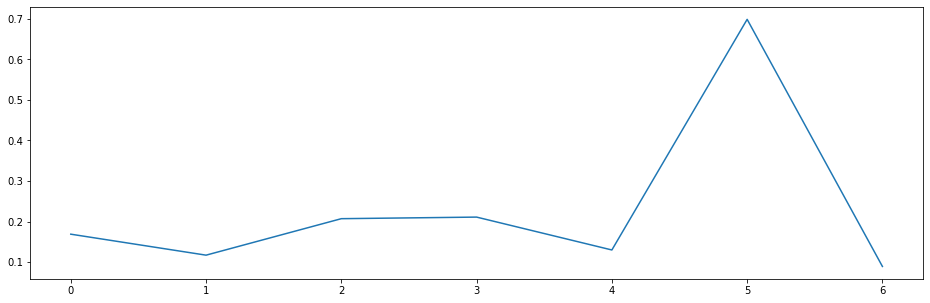

In [208]:
plt.figure(figsize=(16,5))
plt.plot(error_rate) 

In [209]:
xgb_pred2 = sc_y.inverse_transform(xgb_pred2)


In [210]:
xgb_pred2

array([[ 9415.539   ],
       [   10.160996],
       [-3383.179   ],
       ...,
       [ -367.84192 ],
       [  -85.959854],
       [ -240.48451 ]], dtype=float32)

In [211]:
import pickle

file = open('xgboost_regression_model.pkl', 'wb')

####### dump info to that file ######### 

pickle.dump(XGB,file)

In [212]:
file.close()

In [4]:
import os

os.getcwd()

'C:\\Users\\Dipsikha'